
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
col_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
df = pd.read_csv('titanic.csv', header = None , names=col_names )
df = df.reset_index(drop=True)
df = df.iloc[1:]
# df.columns = col_names # setting dataframe column names
df = df.astype({'PassengerId':'int32','Survived':'int32','Pclass':'category','Sex':'category','Age':'float32','SibSp':'int32','Parch':'int32','Fare':'float32','Embarked':'category'})

%matplotlib inline
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S


In [9]:
#Dropping Cabin because of high NaN Values
print(df.isnull().sum())
df.drop('Cabin', axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df.head(5)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


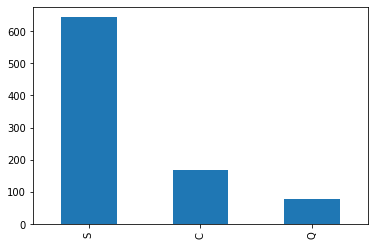

In [ ]:
print(df.isnull().sum())
df['Embarked'].value_counts().plot(kind='bar')
#Since the Maximum passenger are form S so we can fill values of S for NULL Values in Embarked
df['Embarked'].fillna('S',inplace=True)

In [ ]:
#Finally Our DataFrame does not contain any NULL Values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['FamilyMembers'] = df['SibSp'] + df['Parch']

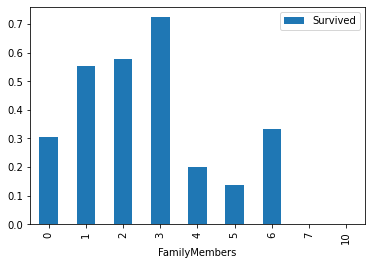

In [ ]:
df[['FamilyMembers','Survived']].groupby('FamilyMembers').mean().plot(kind='bar')
#Familty of size 3 has the highest chances of survival

In [ ]:
df=pd.get_dummies(df, columns=["Pclass","Embarked","Sex"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int32  
 1   Survived       891 non-null    int32  
 2   Name           891 non-null    object 
 3   Age            891 non-null    float32
 4   SibSp          891 non-null    int32  
 5   Parch          891 non-null    int32  
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float32
 8   FamilyMembers  891 non-null    int32  
 9   Pclass_1       891 non-null    uint8  
 10  Pclass_2       891 non-null    uint8  
 11  Pclass_3       891 non-null    uint8  
 12  Embarked_C     891 non-null    uint8  
 13  Embarked_Q     891 non-null    uint8  
 14  Embarked_S     891 non-null    uint8  
 15  Sex_female     891 non-null    uint8  
 16  Sex_male       891 non-null    uint8  
dtypes: float32(2), int32(5), object(2), uint8(8)
memory us

In [ ]:
#Dropping Columns that are not required
#Name does not affect the whether the passenger survived/not survived
#Sex_female as Sex_male is already present
df.drop('Sex_female', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [ ]:
df.describe()

,Survived,Age,Fare,FamilyMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204247,0.904602,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,0.486592,13.019696,49.693409,1.613459,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,512.329224,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int32  
 1   Age            891 non-null    float32
 2   Fare           891 non-null    float32
 3   FamilyMembers  891 non-null    int32  
 4   Pclass_1       891 non-null    uint8  
 5   Pclass_2       891 non-null    uint8  
 6   Pclass_3       891 non-null    uint8  
 7   Embarked_C     891 non-null    uint8  
 8   Embarked_Q     891 non-null    uint8  
 9   Embarked_S     891 non-null    uint8  
 10  Sex_male       891 non-null    uint8  
dtypes: float32(2), int32(2), uint8(7)
memory usage: 20.1 KB


In [ ]:
x = df[['Age','Fare','FamilyMembers','Pclass_1','Pclass_2','Embarked_C','Embarked_Q','Embarked_S','Sex_male']].to_numpy()
y = df[['Survived']].to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(891, 9)
(891, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [ ]:
class LogisticRegression:
  def __init__(self):
    pass
  def train(self,X_train,y_train):
    self.y = y_train
    self.X = X_train
    self.m ,self.n = X_train.shape
    self.X = np.hstack((np.ones((self.m,1)),self.X))
    self.m ,self.n = self.X.shape
    self.theta = np.ones((self.n,1))
    self.h = self.sigmoid(self.X@self.theta)

  def compute(self,alpha,iter):
    epsilon = 1e-5
    self.cost = np.ones((iter,1))
    # self.w = np.ones((iter,self.n))
    for i in range(iter):
      self.theta = self.theta - ( alpha/self.m ) * self.X.T@(self.h-self.y)
      self.h = self.sigmoid(self.X@self.theta)
      self.cost[i] = (1/self.m)*(((-self.y).T @ np.log(self.h + epsilon))-((1-self.y).T @ np.log((1-self.h) + epsilon)))
      # self.w[i] = self.theta.T
    return self.cost

  def sigmoid(self,X):
    return 1 / (1 + np.exp(-X))

  def predict(self,X_test):
    h = self.sigmoid(X_test@self.theta)
    return np.rint(h)
    # return np.rint(h)



In [ ]:
l = LogisticRegression()
l.train(X_train,y_train)

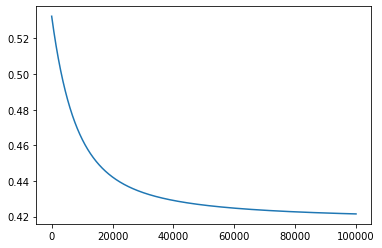

In [ ]:
cost = l.compute(0.001,100000)
plt.figure()
plt.plot(range(100000),cost)
plt.show()

In [ ]:
xtest = np.hstack((np.ones((X_test.shape[0],1)),X_test))
ypredict = l.predict(xtest)
print(accuracy_score(y_test, ypredict))
print(confusion_matrix(y_test,ypredict))
print(classification_report(y_test,ypredict))

0.7835820895522388
[[133  20]
 [ 38  77]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       153
           1       0.79      0.67      0.73       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

